Load the data
Clean the data
Features:
[[  1.     89.     66.    ...  28.1     0.167  21.   ]
 [  0.    137.     40.    ...  43.1     2.288  33.   ]
 [  3.     78.     50.    ...  31.      0.248  26.   ]
 ...
 [  2.     88.     58.    ...  28.4     0.766  22.   ]
 [ 10.    101.     76.    ...  32.9     0.171  63.   ]
 [  5.    121.     72.    ...  26.2     0.245  30.   ]]
Targets:
[0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0

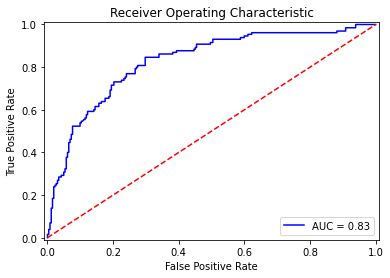

Grid Search for Hyperparameters


C:\Users\mendej5\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Optimal parameters: {'C': 100, 'gamma': 0.01}
Group 3 2020 covid year
Model evaluation (Optimal Hyperparameters)
Accuracy:
0.8354430379746836
Classification report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88        53
         1.0       0.81      0.65      0.72        26

    accuracy                           0.84        79
   macro avg       0.83      0.79      0.80        79
weighted avg       0.83      0.84      0.83        79

Confusion matrix (Optimal Hyperparameters)
ROC curve (Optimal Hyperparameters)


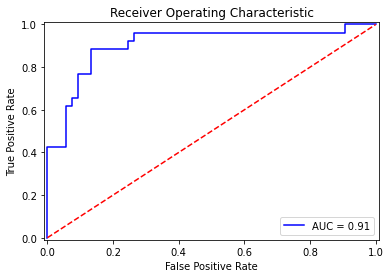

In [1]:
# IEE 520: Fall 2019
# Support Vector Machines
# Klim Drobnyh (klim.drobnyh@asu.edu)

# For compatibility with Python 2
from __future__ import print_function

# To load pandas
import pandas as pd

# To load numpy
import numpy as np

# To import the classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# To measure accuracy
from sklearn import metrics
from sklearn import model_selection

# To import the scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

# To support plots
import matplotlib.pyplot as plt


class DummyScaler:
    
    def fit(self, data):
        pass
    
    def transform(self, data):
        return data

def create_scaler_dummy():
    return DummyScaler()
    
def create_scaler_standard():
    return StandardScaler()

def create_scaler_minmax():
    return MinMaxScaler()

def crete_scaler_binarizer():
    return Binarizer()

# You can choose a scaler (just one should be uncommented):
# create_scaler = create_scaler_dummy
# create_scaler = create_scaler_standard
create_scaler = create_scaler_minmax
# create_scaler = create_scaler_binarizer


def create_model_naive_bayes():
    model = GaussianNB()
    return model

def create_model_mlpclassifier():
    # You can find the full list of parameters here:
    # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
    model = MLPClassifier(hidden_layer_sizes=(10,), random_state=seed)
    return model

def create_model_svc():
    # You can find the full list of parameters here:
    # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    model = SVC(random_state=seed, probability=True)
    return model

# You can choose a classifier (just one should be uncommented):
# create_model = create_model_naive_bayes
# create_model = create_model_mlpclassifier
create_model = create_model_svc


seed = 520
np.set_printoptions(precision=3)


print('Load the data')
# This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
# The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, 
# based on certain diagnostic measurements included in the dataset. 
# Several constraints were placed on the selection of these instances from a larger database. 
# In particular, all patients here are females at least 21 years old of Pima Indian heritage.

# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1)

names=['Pregnancies', 'Glucose', 'BloodPressure', 
       'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Class']
data = pd.read_csv('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv', skiprows=9, header=None, names=names)

print('Clean the data')
# Remove missing values
data = data[data['Glucose'] != 0]
data = data[data['BloodPressure'] != 0]
data = data[data['SkinThickness'] != 0]
data = data[data['Insulin'] != 0]
data = data[data['BMI'] != 0]
data = data[data['Age'] != 0]

vals = data.values
y = vals[:, -1]
X = vals[:, :-1]

print('Features:')
print(X)


print('Targets:')
print(y)


print('Train the model and predict')
scaler = create_scaler()
model = create_model()
model.fit(X, y)
y_hat = model.predict(X)


print('Model evaluation (train)')
print('Accuracy:')
print(metrics.accuracy_score(y, y_hat))
print('Classification report:')
print(metrics.classification_report(y, y_hat))


print('Confusion matrix (train)')
# You need to install pandas_ml in order to use that!
# conda install -c conda-forge pandas_ml
#from pandas_ml import ConfusionMatrix


#cm = ConfusionMatrix(y, y_hat)
#print(cm)


# cm.print_stats()
# ax = cm.plot(backend='seaborn', annot=True, fmt='g')
# ax.set_title('Confusion Matrix (Train)')
# plt.show()


print('Cross-validation')
np.random.seed(seed)
y_prob = np.zeros(y.shape)
y_hat = np.zeros(y.shape)

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

# Cross-validation
for train, test in kfold.split(X, y):
    # Train classifier on training data, predict test data
    
    # Scaling train and test data
    # Train scaler on training set only
    scaler.fit(X[train])
    X_train = scaler.transform(X[train])
    X_test = scaler.transform(X[test])
    
    model = create_model()
    model.fit(X_train, y[train])
    y_prob[test] = model.predict_proba(X_test)[:, 1]
    y_hat[test] = model.predict(X_test)


print('Model evaluation (CV)')
print('Accuracy:')
print(metrics.accuracy_score(y, y_hat))
print('Classification report:')
print(metrics.classification_report(y, y_hat))


# cm = ConfusionMatrix(y, y_hat)
# print(cm)


# cm.print_stats()
# ax = cm.plot(backend='seaborn', annot=True, fmt='g')
# ax.set_title('Confusion Matrix (CV)')
# plt.show()


print('ROC curve')

def plot_roc_curve(y_true, y_prob):
    # ROC curve code here is for 2 classes only
    if len(np.unique(y)) == 2: 
        fpr, tpr, threshold = metrics.roc_curve(y_true, y_prob)
        roc_auc = metrics.auc(fpr, tpr)
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([-0.01, 1.01])
        plt.ylim([-0.01, 1.01])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

plot_roc_curve(y, y_prob)


print('Grid Search for Hyperparameters')

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=520)
scaler = create_scaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Here we should use specific classifier, because of the parameters
model = model_selection.GridSearchCV(SVC(kernel='rbf', random_state=520, probability=True),
                         cv=5,
                         n_jobs=-1,
                         iid=True,
                         param_grid={
                             'C': [10**x for x in range(-3, 4)], 
                             'gamma': [10**x for x in range(-3, 4)]
                         })

model.fit(X_train, y_train)
print('Optimal parameters:', model.best_params_)
y_test_hat = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print('Group 3 2020 covid year')

print('Model evaluation (Optimal Hyperparameters)')
print('Accuracy:')
print(metrics.accuracy_score(y_test, y_test_hat))
print('Classification report:')
print(metrics.classification_report(y_test, y_test_hat))


print('Confusion matrix (Optimal Hyperparameters)')

# cm = ConfusionMatrix(y_test, y_test_hat)
# print(cm)


# cm.print_stats()
# ax = cm.plot(backend='seaborn', annot=True, fmt='g')
# ax.set_title('Confusion Matrix (Optimal Hyperparameters)')
# plt.show()


print('ROC curve (Optimal Hyperparameters)')

plot_roc_curve(y_test, y_test_prob)
